In [5]:
import cv2 as ame
import numpy as me
import matplotlib.pyplot as you

In [6]:
pict = ame.imread('buah.jpg')

In [7]:
pict1 = ame.cvtColor(pict, ame.COLOR_BGR2GRAY)
edges = ame.Canny(pict, 100, 150)

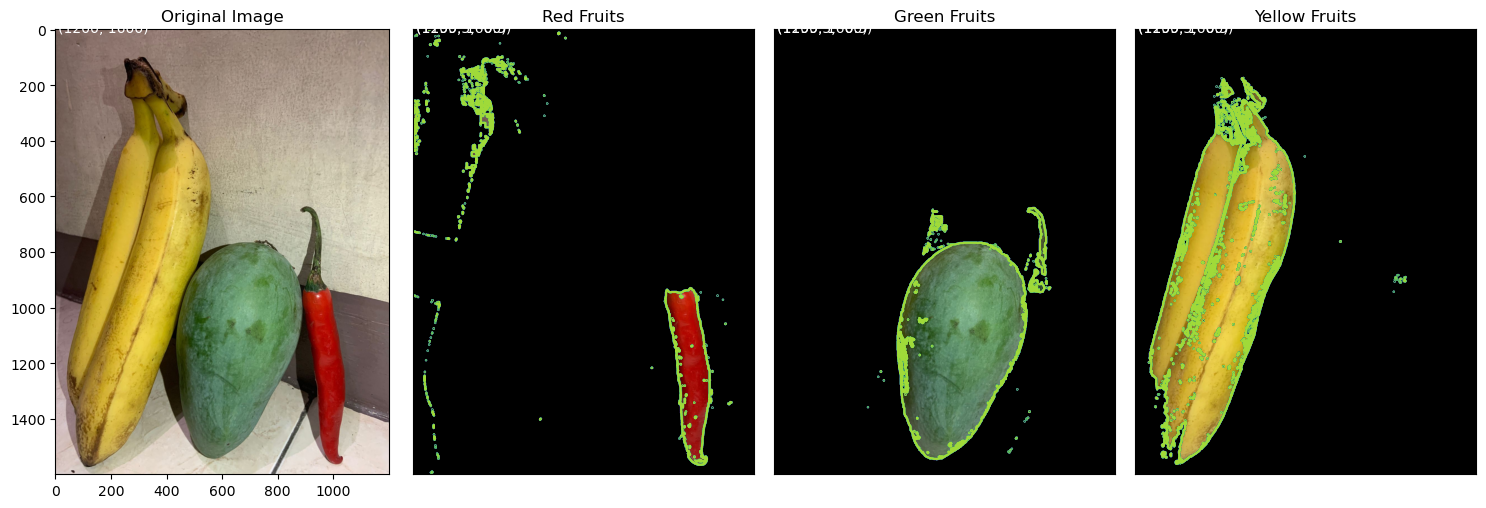

In [18]:

def color_segmentation(image_path):
    pict2 = ame.imread(image_path)
    pict2 = ame.cvtColor(pict2, ame.COLOR_BGR2RGB)

    hsv_image = ame.cvtColor(pict2, ame.COLOR_RGB2HSV)

    lower_green = me.array([32, 45, 45], dtype=me.uint8)
    upper_green = me.array([89, 247, 247], dtype=me.uint8)

    lower_red = me.array([0, 67, 67], dtype=me.uint8)
    upper_red = me.array([10, 255, 255], dtype=me.uint8)

    lower_yellow = me.array([20, 98, 98], dtype=me.uint8)
    upper_yellow = me.array([30, 247, 247], dtype=me.uint8)

    mask_red = ame.inRange(hsv_image, lower_red, upper_red)
    mask_green = ame.inRange(hsv_image, lower_green, upper_green)
    mask_yellow = ame.inRange(hsv_image, lower_yellow, upper_yellow)

    result_red = ame.bitwise_and(pict2, pict2, mask=mask_red)
    result_green = ame.bitwise_and(pict2, pict2, mask=mask_green)
    result_yellow = ame.bitwise_and(pict2, pict2, mask=mask_yellow)

    fig, axs = you.subplots(1, 4, figsize=(15, 5))

    axs = axs.ravel()

    axs[0].imshow(pict2)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[0].text(10, 10, f"({pict2.shape[1]}, {pict2.shape[0]})", color='white')

    axs[1].imshow(result_red)
    axs[1].contour(mask_red)
    axs[1].set_title('Red Fruits')
    axs[1].axis('on')
    axs[1].text(10, 10, f"({result_red.shape[1]}, {result_red.shape[0]})", color='white')

    axs[2].imshow(result_green)
    axs[2].contour(mask_green)
    axs[2].set_title('Green Fruits')
    axs[2].axis('on')
    axs[2].text(10, 10, f"({result_green.shape[1]}, {result_green.shape[0]})", color='white')

    axs[3].imshow(result_yellow)
    axs[3].contour(mask_yellow)
    axs[3].set_title('Yellow Fruits')
    axs[3].axis('on')
    axs[3].text(10, 10, f"({result_yellow.shape[1]}, {result_yellow.shape[0]})", color='white')

    # Rotate the images
    for ax in axs[1:]:
        ax.set_adjustable('box')
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        ax.set_frame_on(True)
        ax.yaxis.set_label_coords(0.5, -0.1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.yaxis.set_ticklabels([])
        ax.xaxis.set_ticklabels([])
        ax.text(10, 10, f"({ax.get_xlim()[1]}, {ax.get_ylim()[1]})", color='white')

        ax.set_aspect('auto')

    you.tight_layout()

    you.show()
    
    # Save segmented images
    ame.imwrite('result_red.jpg', result_red)
    ame.imwrite('result_green.jpg', result_green)
    ame.imwrite('result_yellow.jpg', result_yellow)

image_path = "buah.jpg"

color_segmentation(image_path)
##AMELIA-NUR-HALIZAH-202131112